Laboratorium 2
Temat: Wczytywanie, wyświetlanie i zapisywanie obrazów i sekwencji obrazów w bibliotece OpenCV.

Nazwisko i Imię: Mateusz Śliwiński  
Nr albumu: 253403  
data wykonania ćwiczenia: 10.10.2023  

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

# 1. Narzędzia

Na zjaęciach będziemy korzystali z pythnona, który jest stosounkowo prostym językiem programowania. Mają Państwo do wyboru korzystanie z Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje.

# 2. Zadania wprowadzające

## Zadanie 1

Wczytaj jeden z przykładowych obrazów z eportalu i wyświetl go z zastosowaniem biblioteki matplotlib.

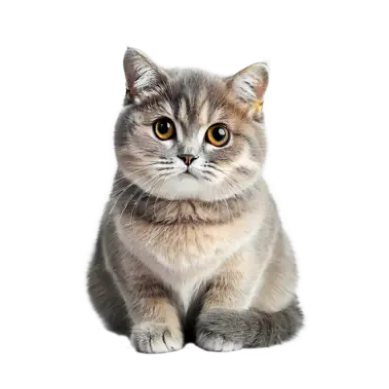

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('cat.png')
plt.imshow(img)
plt.axis('off')
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Zadanie 2

Wczytaj obraz i rozdziel go na trzy składowe: R, G i B, a następnie wyświetl każdy kanał w osobnej komórce

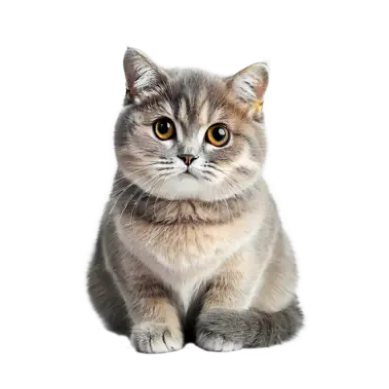

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('cat.png')
plt.imshow(img)
plt.axis('off')
plt.show()


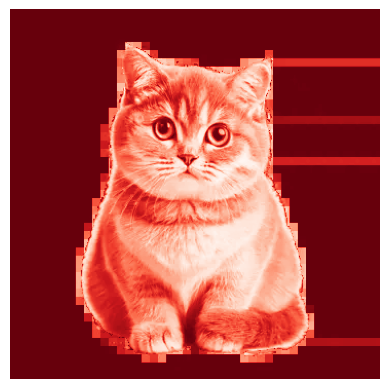

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('cat.png')
plt.axis('off')
plt.imshow(img[:, :, 0], cmap='Reds_r')


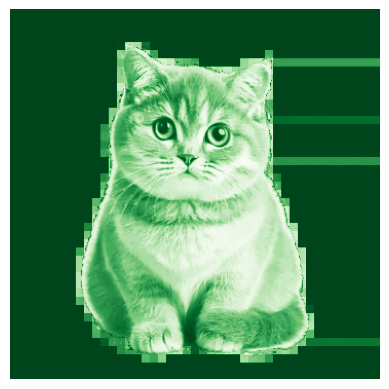

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('cat.png')
plt.axis('off')
plt.imshow(img[:, :, 0], cmap='Greens_r')

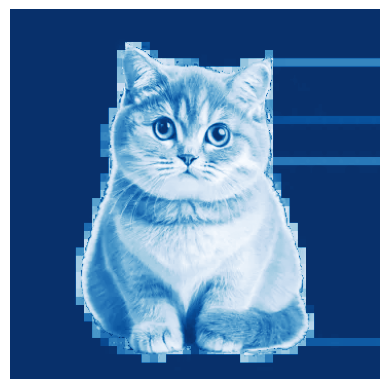

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('cat.png')
plt.axis('off')
plt.imshow(img[:, :, 0], cmap='Blues_r')

## Zadanie 3

Korzystając z obrazów na eportalu zapoznaj się z funkcjami umożliwiającymi zmianę rozmiaru obrazu
(skalowanie), obrót obrazu i przycięcia obrazu.

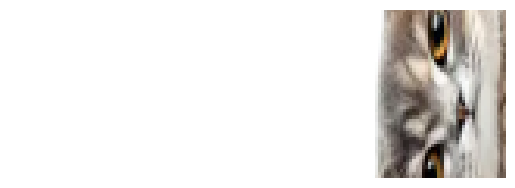

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = Image.open('cat.png')
#resizing
img = img.resize((320, 110))
#rotating
img = img.rotate(90)
#cropping
width, height = img.size
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
img = img.crop((left, top, right, bottom))
plt.imshow(img)
plt.axis('off')
plt.show()


## Zadanie 4

wczytaj zdjęcie kolorowe i zamień je na obraz w odcieniach szarości

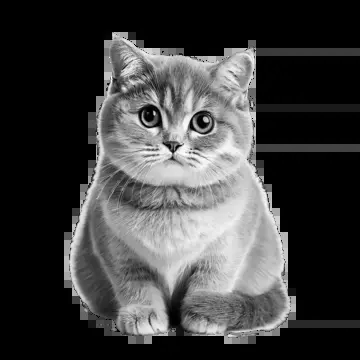

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread('cat.png')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImage)

## Zadanie 5

Obraz z zadania 4 zamień na obraz binarny.

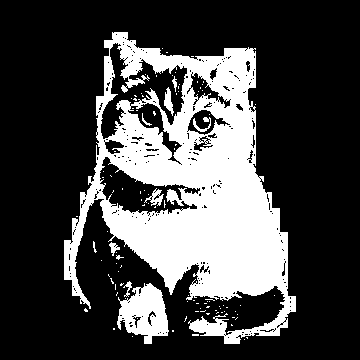

In [ ]:


# cv2_imshow(grayImage)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(blackAndWhiteImage)


## Zadanie 6

Wczytaj obraz ’cameraman.tif’ i wyświetl jego histogram oraz zdjęcie.

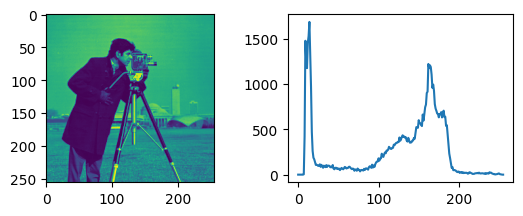

In [13]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('cameraman.tif',0)
plt.subplot(221)
plt.imshow(img)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(222)
plt.plot(histr)
plt.show()
#oryginalny obraz jest szary, wyswietla sie w taki sposob ze wzgledu na roznice RGB/BRG

# 3. Więcej zadań

## Zadanie 1

Utwórz zdjęcie sytntetyczne jak na przykładzie i zapisz je na dysku.  
  
  ![obraz.png](attachment:obraz.png)

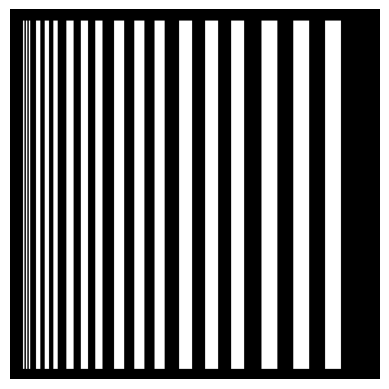

In [ ]:
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

img = Image.new('RGB', (256, 256))
plt.axis('off')
x, y = img.size
draw = ImageDraw.Draw(img)
# startpoint = (start_x1, start_y1), (start_x2, start_y2)
start_x1 = 7
start_y1 = 8
start_x2 = 7
start_y2 = y-8
gap = 0
helper = 2
x = 18
costam=0
szerokosc = 1
# draw.line(startpoint, fill='gray', width=int(1))
for zmienna in range(x):
  gap+=helper
  startpoint = (start_x1+gap, start_y1), (start_x2+gap, start_y2)
  draw.line(startpoint, fill='white', width=int(szerokosc))
  costam+=1
  if(costam % 3 ==0):
    costam = 0
    szerokosc+=2
    helper+=4




plt.imshow(img)
# img.save('image.png')

## Zadanie 2

Bazując na utworzonym zdjęciu w zadaniu 1 napisz kod pozwalający na zamianę losowych pikseli na kolor biały (jeżeli kolor piksela jest czarny) i czarny (jeśli kolor piksela jest szary lub biały)

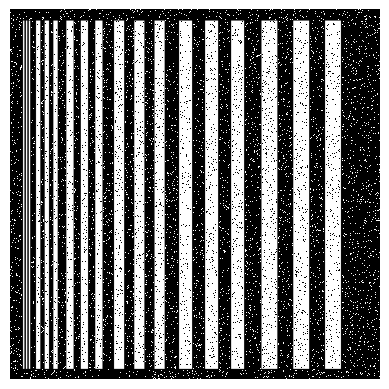

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
image = Image.open('synthetic_white.png')
image = image.convert("RGB")
# r,g,b = imgage.getpixel((0,0));
# plt.axis('off')
# plt.imshow(img)
width, height = image.size
edited_image = image.copy()
percentage_to_change = 6
num_pixels_to_change = (width * height * percentage_to_change) // 100

pixels_to_change = random.sample([(x, y) for x in range(width) for y in range(height)], num_pixels_to_change)

for x, y in pixels_to_change:
    pixel = image.getpixel((x, y))
    if pixel == (0, 0, 0):
        edited_image.putpixel((x, y), (255, 255, 255))
    elif pixel == (255, 255, 255):
        edited_image.putpixel((x, y), (0, 0, 0))

plt.imshow(edited_image)
plt.axis('off')
plt.show()

## Zadanie 3

Dla obrazów tarczy dostępnych na eportalu dokonaj analizy, która pozwoli określić, czy jedna z tarcz jest uszkodzona -> dokonaj odejmowania obrazów.

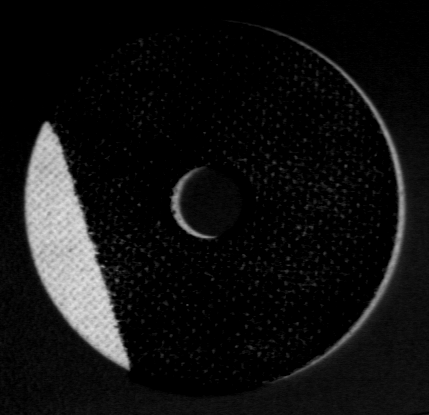

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

grinder1 = cv2.imread('grinder_cut.bmp')
grinder2 = cv2.imread('grinder_good.bmp')

subtracted = cv2.subtract(grinder1, grinder2)

cv2_imshow(subtracted)
